In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(url)
df


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [4]:
df=df[['tenure','age','address','income','ed','employ','equip','churn']]

In [9]:
x=np.asarray(df[['tenure','age','address','income','ed','employ','equip']])

In [10]:
x

array([[11., 33.,  7., ...,  5.,  5.,  0.],
       [33., 33., 12., ...,  2.,  0.,  0.],
       [23., 30.,  9., ...,  1.,  2.,  0.],
       ...,
       [ 6., 32., 10., ...,  1., 10.,  0.],
       [24., 30.,  0., ...,  4.,  5.,  0.],
       [61., 50., 16., ...,  2., 22.,  1.]])

In [18]:
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [16]:
y=df[['churn']]
y[0:5]

,churn
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


In [21]:
x_norm=StandardScaler().fit(x)

In [25]:
x_norm=x_norm.transform(x)
x_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train[0:5]

array([[45., 30.,  0., 63.,  5.,  4.,  1.],
       [ 6., 32., 10., 47.,  1., 10.,  0.],
       [46., 42.,  9., 52.,  4.,  7.,  0.],
       [53., 22.,  1., 25.,  4.,  0.,  1.],
       [24., 35., 10., 41.,  5.,  6.,  1.]])

In [36]:
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [44]:
lr=LogisticRegression().fit(x_train,y_train)

C:\Users\2003j\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
y_hat=lr.predict(x_test)

In [55]:
y_hat[:10]

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

In [60]:
y_hat_prob=lr.predict_proba(x_test)
y_hat_prob[0:10]

array([[0.52554605, 0.47445395],
       [0.2035269 , 0.7964731 ],
       [0.78076287, 0.21923713],
       [0.67866243, 0.32133757],
       [0.8296298 , 0.1703702 ],
       [0.30385058, 0.69614942],
       [0.9803522 , 0.0196478 ],
       [0.53650241, 0.46349759],
       [0.52753211, 0.47246789],
       [0.8857783 , 0.1142217 ]])

In [69]:
lr

LogisticRegression()

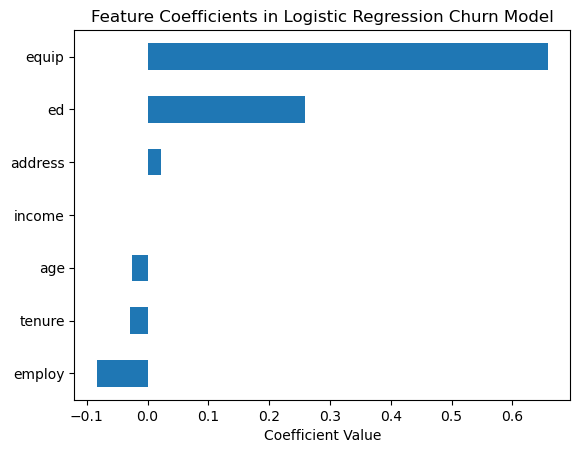

In [71]:
coefficients = pd.Series(lr.coef_[0], index=df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [73]:
log_loss(y_test, y_hat_prob)

0.418168124083221

In [75]:
x_test[1]

array([  4.,  35.,  16., 161.,   5.,   6.,   1.])

In [80]:
lr.predict(np.array([  4.,  35.,  16., 161.,   5.,   6.,   1.]).reshape(1,-1))


array([1.])

In [90]:
lr.predict(np.array([40., 45., 20., 200., 5., 25., 1.]).reshape(1,-1))


array([0.])

#  Predicting churn


#enter the values in this order'tenure','age','address','income','ed','employ','equip','churn'

In [ ]:
lr.predict(np.array([#remove this and enter here]).reshape(1,-1))